In [1]:
import pandas as pd
%matplotlib inline

In [2]:
data = pd.read_csv('data/FB.csv')

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-07-16,207.500000,208.720001,206.839996,207.229996,207.229996,11078200
1,2018-07-17,204.899994,210.460007,204.839996,209.990005,209.990005,15349900
2,2018-07-18,209.820007,210.990005,208.440002,209.360001,209.360001,15334900
3,2018-07-19,208.770004,209.990005,207.759995,208.089996,208.089996,11350400
4,2018-07-20,208.850006,211.500000,208.500000,209.940002,209.940002,16163900


In [4]:
data['Date'].dtype

dtype('O')

In [5]:
data['Date'] = pd.to_datetime(data['Date'])

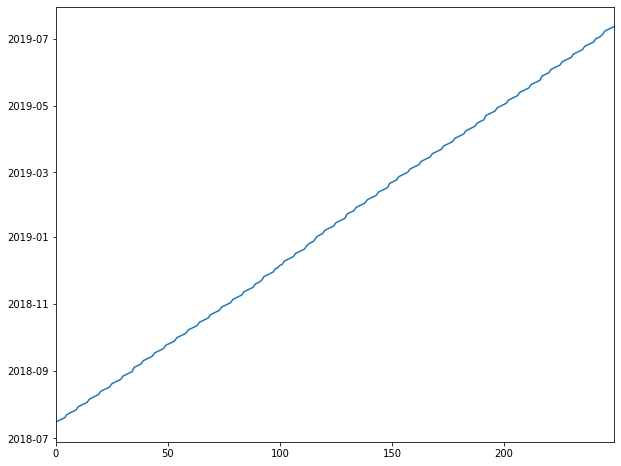

In [6]:
data['Date'].plot(figsize=(10,8))

In [7]:
data.Close.describe()

count    250.000000
mean     166.847239
std       19.512094
min      124.059998
25%      151.057499
50%      166.690002
75%      179.950001
max      217.500000
Name: Close, dtype: float64

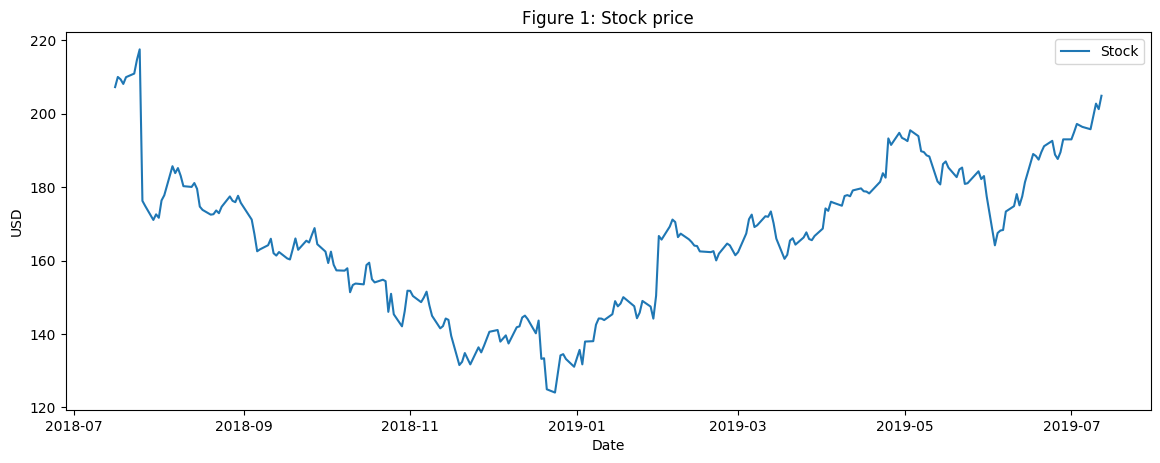

In [8]:
import matplotlib.pyplot as plt
import datetime


plt.figure(figsize=(14, 5), dpi=100)
plt.plot(data['Date'], data['Close'], label='Stock')
# plt.vlines(datetime.date(2018,6,13), 0, 27000, linestyles='--', colors='gray', label='Train/Test data cut-off')
plt.xlabel('Date')
plt.ylabel('USD')
plt.title('Figure 1: Stock price')
plt.legend()
plt.show()

In [9]:
num_training_days = int(data.shape[0]*.7)
print('Number of training days: {}. Number of test days: {}.'.format(num_training_days, \
                                                                    data.shape[0]-num_training_days))

Number of training days: 175. Number of test days: 75.


In [10]:
# creating Technical points or RSI relative strength index

data_stock = data[['Date', 'Close']]

rsi_period = 14
chg = data['Close'].diff(1)
gain = chg.mask(chg<0,0)
loss = chg.mask(chg>0,0)
avg_gain = gain.ewm(com=rsi_period-1,min_periods=rsi_period).mean()
avg_loss = loss.ewm(com=rsi_period-1,min_periods=rsi_period).mean()

rs = abs(avg_gain/avg_loss)
rsi = 100 - (100/(1+rs))

"""ps: when the rsi is below 30 it is considered oversold 
   and if it is over 70 it is considered overbought"""

# data_stock['gain'] = gain
# data_stock['loss'] = loss
# data_stock['avg_gain'] = avg_gain
# data_stock['avg_loss'] = avg_loss


#moving average 
data_stock['ma7'] = data['Close'].rolling(window=7).mean()
data_stock['ma21'] = data['Close'].rolling(window=21).mean()

#Exponential Moving average
data_stock['ema'] = data_stock['Close'].ewm(com=0.5).mean()

#Bollinger Bands
std = data_stock.Close.rolling(20).std()
data_stock['upperBand'] = data_stock['ma21'] + (std*2)
data_stock['lowerBand'] = data_stock['ma21'] - (std*2)


# Create Momentum
data_stock['momentum'] = data_stock['Close']-1

#MACD
exp1 = data_stock.Close.ewm(span=26).mean()
exp2 = data_stock.Close.ewm(span=12).mean()
data_stock['macd'] = exp2-exp1


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [11]:
data_stock.head(10)

,Date,Close,ma7,ma21,ema,upperBand,lowerBand,momentum,macd
0,2018-07-16,207.229996,NaN,NaN,207.229996,NaN,NaN,206.229996,0.000000
1,2018-07-17,209.990005,NaN,NaN,209.300003,NaN,NaN,208.990005,0.061923
2,2018-07-18,209.360001,NaN,NaN,209.341540,NaN,NaN,208.360001,0.059366
3,2018-07-19,208.089996,NaN,NaN,208.496748,NaN,NaN,207.089996,0.010895
4,2018-07-20,209.940002,NaN,NaN,209.462893,NaN,NaN,208.940002,0.057943
5,2018-07-23,210.910004,NaN,NaN,210.428959,NaN,NaN,209.910004,0.126614
6,2018-07-24,214.669998,210.027143,NaN,213.257612,NaN,NaN,213.669998,0.338807
7,2018-07-25,217.500000,211.494287,NaN,216.086302,NaN,NaN,216.500000,0.610235
8,2018-07-26,176.259995,206.675714,NaN,189.534082,NaN,NaN,175.259995,-1.257157
9,2018-07-27,174.889999,201.751428,NaN,179.771195,NaN,NaN,173.889999,-2.634113


In [12]:
data_stock.ma7[:1]

0   NaN
Name: ma7, dtype: float64

In [13]:
def plot_technical_indicators(dataset, last_days):
    plt.figure(figsize=(16, 10), dpi=100)
    shape_0 = dataset.shape[0]
    xmacd_ = shape_0-last_days
    
    dataset = dataset.iloc[-last_days:, :]
    x_ = range(3, dataset.shape[0])
    x_ =list(dataset.index)
    
    # Plot first subplot
    plt.subplot(2, 1, 1)
    plt.plot(dataset['ma7'],label='MA 7', color='g',linestyle='--')
    plt.plot(dataset['Close'],label='Closing Price', color='b')
    plt.plot(dataset['ma21'],label='MA 21', color='r',linestyle='--')
    plt.plot(dataset['upperBand'],label='Upper Band', color='c')
    plt.plot(dataset['lowerBand'],label='Lower Band', color='c')
    plt.fill_between(x_, dataset['lowerBand'], dataset['upperBand'], alpha=0.35)
    plt.title('Technical indicators for Apple Inc - last {} days.'.format(last_days))
    plt.ylabel('USD')
    plt.legend()

    # Plot second subplot
    plt.subplot(2, 1, 2)
    plt.title('MACD')
    plt.plot(dataset['macd'],label='MACD', linestyle='-.')
    plt.hlines(15, xmacd_, shape_0, colors='g', linestyles='--')
    plt.hlines(-15, xmacd_, shape_0, colors='g', linestyles='--')
#     plt.plot(dataset['log_momentum'],label='Momentum', color='b',linestyle='-')

    plt.legend()
    plt.show()

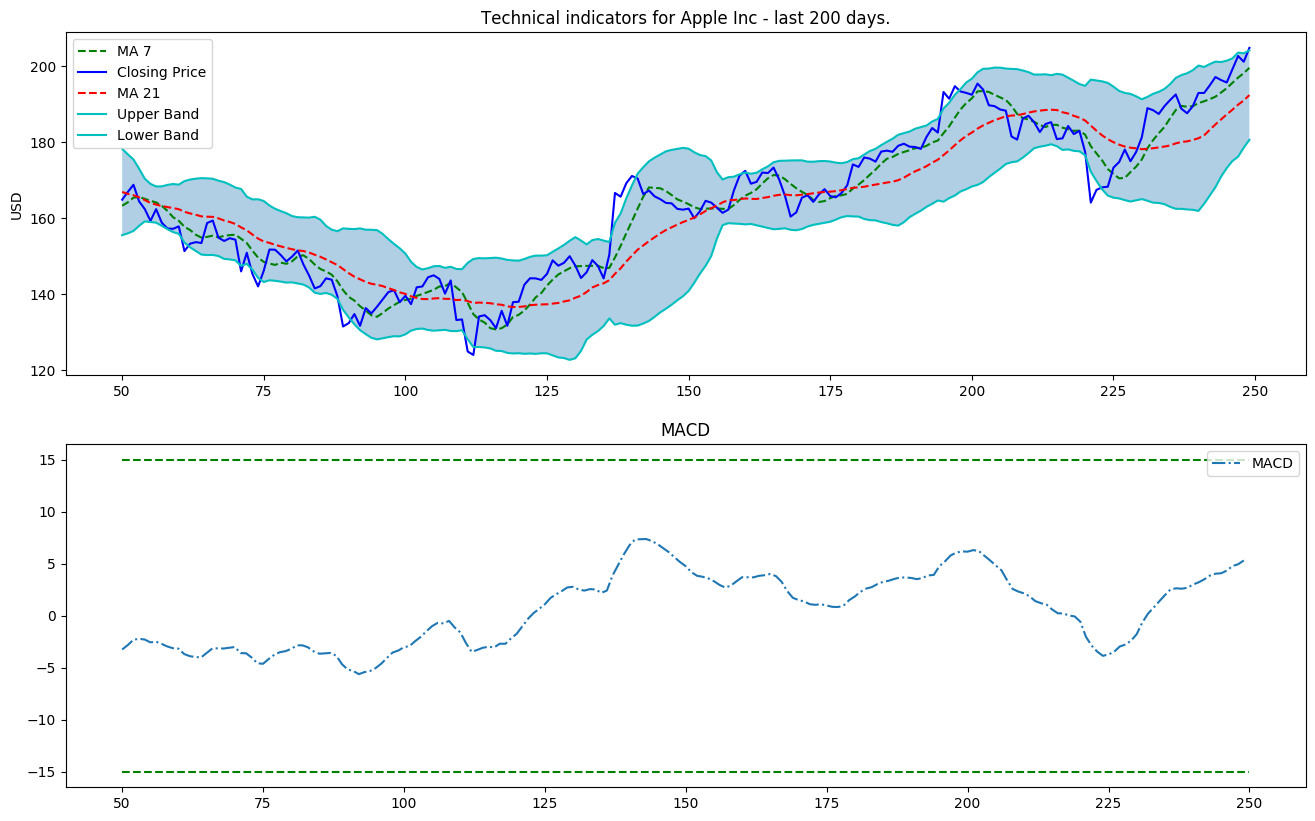

In [14]:
plot_technical_indicators(data_stock, 200)

In [15]:
data_stock.tail()

,Date,Close,ma7,ma21,ema,upperBand,lowerBand,momentum,macd
245,2019-07-08,195.759995,194.265712,187.366667,195.950735,201.488863,173.244470,194.759995,4.080250
246,2019-07-09,199.210007,195.652856,188.598095,198.123583,202.102393,175.093797,198.210007,4.341247
247,2019-07-10,202.729996,197.042856,189.927142,201.194525,203.626718,176.227566,201.729996,4.777056
248,2019-07-11,201.229996,198.218569,191.028570,201.218172,203.445270,178.611871,200.229996,4.944405
249,2019-07-12,204.869995,199.628569,192.449047,203.652721,204.225313,180.672781,203.869995,5.309542


In [16]:
import numpy as np

In [17]:
fourier_transform = np.fft.fft(np.array(data_stock['Close'].tolist()))
fourier_df = pd.DataFrame({'fourier':fourier_transform})
fourier_df['absolute'] = fourier_df['fourier'].apply(lambda x: np.abs(x))
fourier_df['angle'] = fourier_df['fourier'].apply(lambda x: np.angle(x))

In [18]:
fourier_df.head()

,fourier,absolute,angle
0,(41711.809846000004+0j),41711.809846,0.000000
1,(2660.6374808132323+1584.424195431781j),3096.674319,0.537108
2,(116.41076561464207-516.934772887482j),529.880199,-1.349297
3,(295.82142943554544+154.22867722564672j),333.611755,0.480587
4,(437.29109900974606-442.12201201024914j),621.848357,-0.790891


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


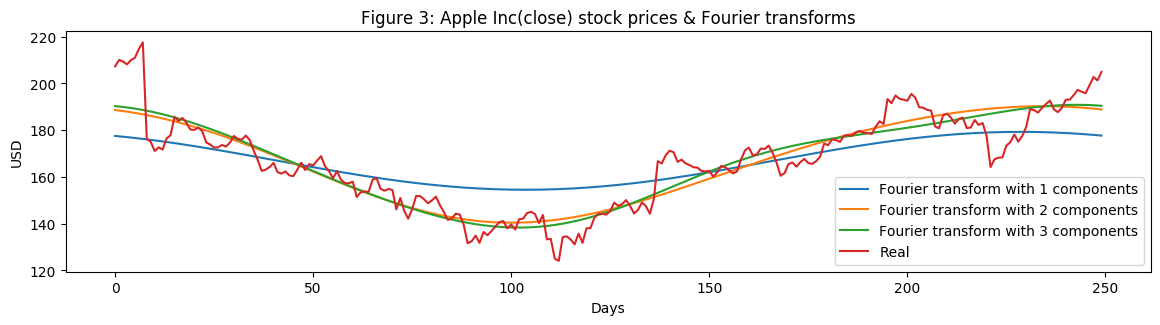

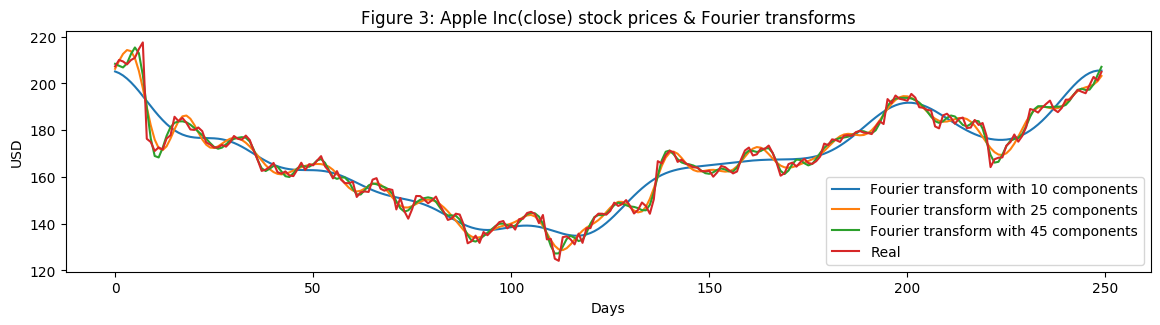

In [19]:
plt.figure(figsize=(14, 7), dpi=100)
plt.subplot(2,1,1)
fft_list = np.asarray(fourier_df['fourier'].tolist())
for num_ in [1,2,3]:
    fft_list_m10= np.copy(fft_list); fft_list_m10[num_:-num_]=0
    plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_))
plt.plot(data_stock['Close'],  label='Real')
plt.xlabel('Days')
plt.ylabel('USD')
plt.title('Figure 3: Apple Inc(close) stock prices & Fourier transforms')
plt.legend()
plt.show()

plt.figure(figsize=(14, 7), dpi=100)
plt.subplot(2,1,2)
fft_list = np.asarray(fourier_df['fourier'].tolist())
for num_ in [10,25,45]:
    fft_list_m10= np.copy(fft_list); fft_list_m10[num_:-num_]=0
    plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_))
plt.plot(data_stock['Close'],  label='Real')
plt.xlabel('Days')
plt.ylabel('USD')
plt.title('Figure 3: Apple Inc(close) stock prices & Fourier transforms')
plt.legend()
plt.show()

In [20]:
print('Total dataset has {} samples, and {} features.'.format(data_stock.shape[0], \
                                                              data_stock.shape[1]))

Total dataset has 250 samples, and 9 features.


In [21]:
def get_feature_importance_data(data):
    data = data.copy()
    y = data['Close']
    X = data.iloc[:, 1:]
    
    train_samples = int(X.shape[0] * 0.65)
 
    X_train = X.iloc[:train_samples]
    X_test = X.iloc[train_samples:]

    y_train = y.iloc[:train_samples]
    y_test = y.iloc[train_samples:]
    
    return (X_train, y_train), (X_test, y_test)

In [22]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(strategy='median')
dataImpute = data_stock.interpolate(method='linear', limit_direction='forward', axis=0)

In [23]:
data_impute = data_stock.fillna(method='bfill')

In [26]:
data_impute.head()

,Date,Close,ma7,ma21,ema,upperBand,lowerBand,momentum,macd
0,2018-07-16,207.229996,210.027143,190.779046,207.229996,224.415373,157.142719,206.229996,0.000000
1,2018-07-17,209.990005,210.027143,190.779046,209.300003,224.415373,157.142719,208.990005,0.061923
2,2018-07-18,209.360001,210.027143,190.779046,209.341540,224.415373,157.142719,208.360001,0.059366
3,2018-07-19,208.089996,210.027143,190.779046,208.496748,224.415373,157.142719,207.089996,0.010895
4,2018-07-20,209.940002,210.027143,190.779046,209.462893,224.415373,157.142719,208.940002,0.057943


In [27]:
(X_train, y_train), (X_test, y_test) = get_feature_importance_data(data_impute)

In [28]:
from sklearn.ensemble import RandomForestRegressor
forr = RandomForestRegressor()
forr.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [29]:
forr.score(X_train, y_train)

0.9997553125680272

In [30]:
forr.feature_importances_

array([5.25559498e-01, 3.40337055e-02, 4.50551889e-04, 1.89528598e-01,
       1.42447803e-04, 4.54093100e-05, 2.49700494e-01, 5.39295610e-04])

In [31]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, forr.predict(X_train))

0.08432874845129587

In [32]:
from sklearn.model_selection import cross_val_score
cross_val_score(forr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

array([-319.70999893,   -1.2398057 ,   -3.04986617,   -5.52300226,
       -345.55793098])

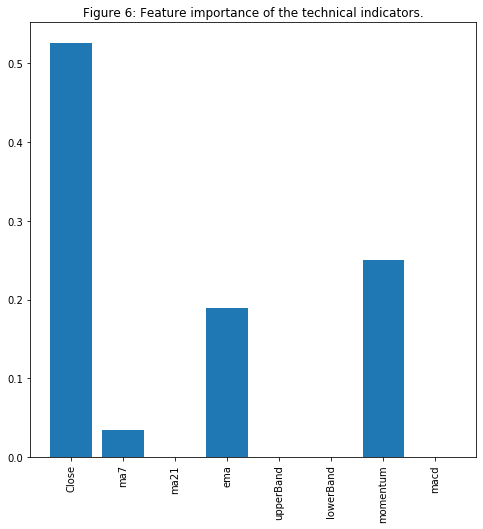

In [33]:
fig = plt.figure(figsize=(8,8))
plt.xticks(rotation='vertical')
plt.bar([i for i in range(len(forr.feature_importances_))], forr.feature_importances_.tolist(), 
        tick_label=X_test.columns)
plt.title('Figure 6: Feature importance of the technical indicators.')
plt.show()

In [34]:
from statsmodels.tsa.arima_model import ARIMA
stock = data_stock['Close']
model = ARIMA(stock, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  249
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -709.987
Method:                       css-mle   S.D. of innovations              4.189
Date:                Sun, 14 Jul 2019   AIC                           1433.974
Time:                        14:44:57   BIC                           1458.596
Sample:                             1   HQIC                          1443.885
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0122      0.245     -0.050      0.960      -0.492       0.468
ar.L1.D.Close     0.0009      0.063      0.015      0.988      -0.123       0.125
ar.L2.D.Close    -0.0122      0.063     

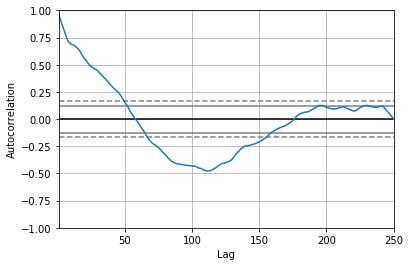

<Figure size 800x560 with 0 Axes>

In [35]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(stock)
plt.figure(figsize=(10, 7), dpi=80)
plt.show()

In [36]:
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

X = stock.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = []
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

In [37]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 10.890


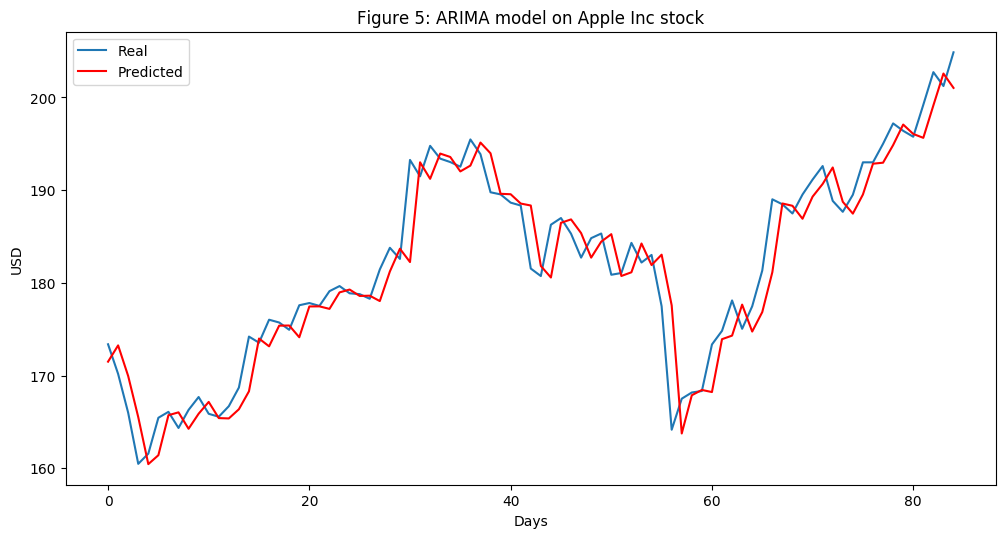

In [38]:
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(test, label='Real')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Days')
plt.ylabel('USD')
plt.title('Figure 5: ARIMA model on Apple Inc stock')
plt.legend()
plt.show()